**Import Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from ipywidgets import interact, IntSlider
import warnings

warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "/content/nigeria_houses_data.csv"
data = pd.read_csv(file_path)

# Display information about the DataFrame
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB
None


**Exlporatory Data Analysis**

In [ ]:
data['title'].unique()

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

In [ ]:
data['state'].unique()

array(['Abuja', 'Lagos', 'Edo', 'Ogun', 'Oyo', 'Imo', 'Anambara',
       'Rivers', 'Enugu', 'Kaduna', 'Kwara', 'Nasarawa', 'Abia', 'Delta',
       'Akwa Ibom', 'Osun', 'Ekiti', 'Cross River', 'Kogi', 'Plateau',
       'Kano', 'Katsina', 'Bayelsa', 'Borno', 'Niger'], dtype=object)

<Axes: xlabel='state'>

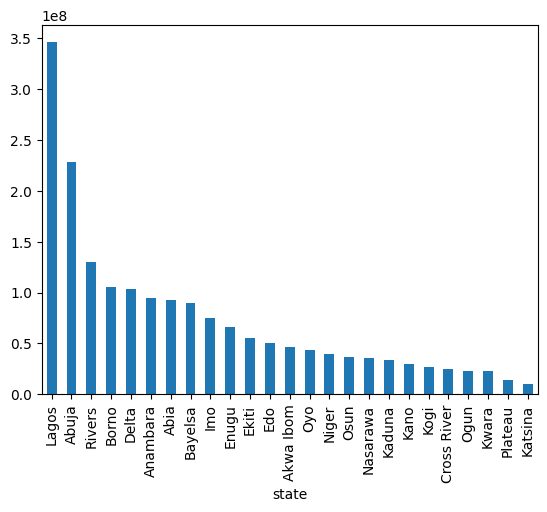

In [ ]:
data.groupby('state')['price'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='town'>

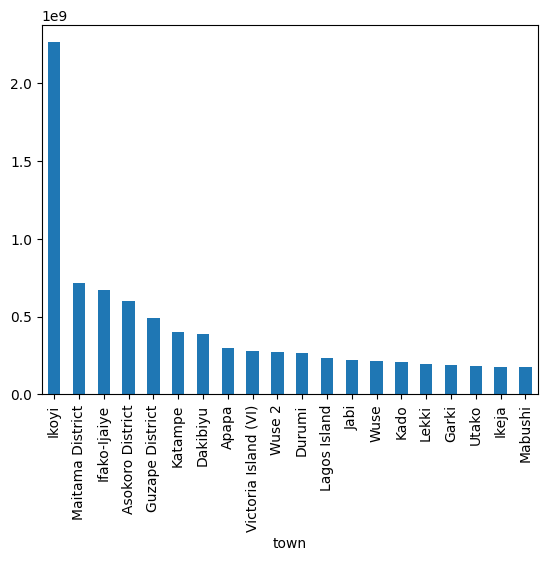

In [ ]:
data.groupby('town')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

In [ ]:
# Detecting suspected outlier
print(data[data["town"]=="Ikoyi"].max())
print(data[data["town"]=="Ifako-Ijaiye"].max())
print(data[data["town"]=="Ikeja"].max())

bedrooms                       9.0
bathrooms                      9.0
toilets                        9.0
parking_space                  9.0
title            Terraced Duplexes
town                         Ikoyi
state                        Lagos
price              1800000000000.0
dtype: object
bedrooms                       7.0
bathrooms                      8.0
toilets                        8.0
parking_space                  8.0
title            Terraced Bungalow
town                  Ifako-Ijaiye
state                        Lagos
price                55000000000.0
dtype: object
bedrooms                       9.0
bathrooms                      9.0
toilets                        9.0
parking_space                  9.0
title            Terraced Duplexes
town                         Ikeja
state                        Lagos
price                 1440000000.0
dtype: object


In [ ]:
trimmed_data = q1, q9 = data["price"].quantile([0.15,0.85])
mask_data = data["price"].between(q1,q9)
trimmed_data = data[mask_data]
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [ ]:
trimmed_data['town'].unique()

array(['Lekki', 'Ajah', 'Oredo', 'Lokogoma District',
       'Victoria Island (VI)', 'Katampe', 'Magodo', 'Kaura', 'Galadimawa',
       'Gwarinpa', 'Yaba', 'Agege', 'Jahi', 'Orozo', 'Owerri North',
       'Ikeja', 'Idu Industrial', 'Owerri Municipal', 'Isheri North',
       'Utako', 'Guzape District', 'Port Harcourt', 'Isheri', 'Ibadan',
       'Ikoyi', 'Life Camp', 'Dape', 'Ejigbo', 'Isolo', 'Gaduwa', 'Dakwo',
       'Asokoro District', 'Chikun', 'Ojodu', 'Lugbe District', 'Wuye',
       'Kubwa', 'Shomolu', 'Ogudu', 'Owerri West', 'Sango Ota',
       'Surulere', 'Obio-Akpor', 'Enugu', 'Apo', 'Ibeju Lekki', 'Wuse 2',
       'Mowe Town', 'Durumi', 'Simawa', 'Arepo', 'Mabushi', 'Alimosho',
       'Maryland', 'Karsana', 'Wuse', 'Karmo', 'Ifo', 'Gbagada', 'Idimu',
       'Maitama District', 'Gudu', 'Ikotun', 'Kukwaba', 'Mbora (Nbora)',
       'Jabi', 'Ikorodu', 'Kaduna South', 'Asaba', 'Uyo', 'Kosofe',
       'Ibafo', 'Ilupeju', 'Afijio', 'Ifako-Ijaiye', 'Ado-Ekiti', 'Ipaja',
       'Oluyo

In [ ]:
records = trimmed_data['state'].value_counts()
records


state
Lagos        13805
Abuja         2462
Rivers         339
Oyo            229
Imo            195
Ogun           141
Enugu           96
Anambara        83
Edo             51
Delta           42
Akwa Ibom       13
Kaduna           8
Ekiti            5
Abia             5
Kogi             4
Nasarawa         4
Osun             3
Kwara            2
Borno            2
Bayelsa          1
Niger            1
Name: count, dtype: int64

In [ ]:
# remove the states with few entries
trimmed_data = trimmed_data[~trimmed_data['state'].isin(records[records < 100].index)]

In [ ]:
trimmed_data['state'].value_counts()

state
Lagos     13805
Abuja      2462
Rivers      339
Oyo         229
Imo         195
Ogun        141
Name: count, dtype: int64

<Axes: title={'center': 'Most Expensive towns in nigeria'}, xlabel='town'>

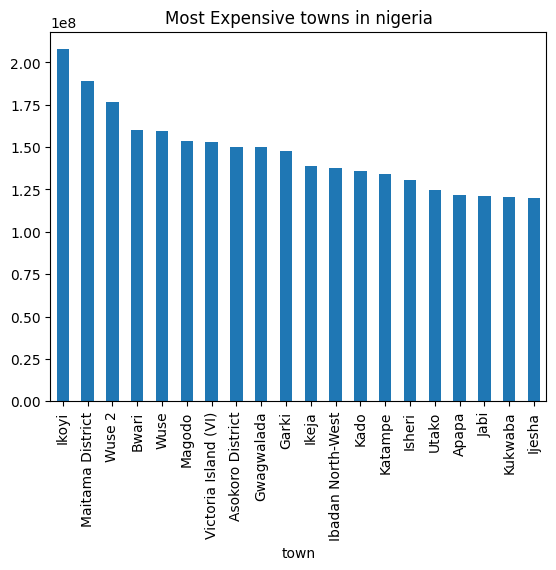

In [ ]:
# checking the chart again
trimmed_data.groupby('town')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar', title="Most Expensive towns in nigeria")

In [ ]:
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [ ]:
trimmed_data['total_rooms'] = trimmed_data['bedrooms'] + trimmed_data['bathrooms'] + trimmed_data['toilets'] + trimmed_data['parking_space']
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,18.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,19.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,15.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0,18.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0,4.0
...,...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0,18.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0,16.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0,18.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0,14.0


**Descriptive Statistics**

In [ ]:
# Display descriptive statistics for numerical columns
numerical_stats = trimmed_data.describe()
print(numerical_stats)

           bedrooms     bathrooms       toilets  parking_space         price  \
count  17171.000000  17171.000000  17171.000000   17171.000000  1.717100e+04   
mean       4.398695      4.661522      5.279425       4.034884  1.027777e+08   
std        0.930131      0.988777      1.013460       1.320465  5.418184e+07   
min        1.000000      1.000000      1.000000       1.000000  3.500000e+07   
25%        4.000000      4.000000      5.000000       4.000000  6.100000e+07   
50%        4.000000      5.000000      5.000000       4.000000  8.500000e+07   
75%        5.000000      5.000000      6.000000       4.000000  1.300000e+08   
max        9.000000      9.000000      9.000000       9.000000  2.600000e+08   

        total_rooms  
count  17171.000000  
mean      18.374527  
std        3.121780  
min        4.000000  
25%       17.000000  
50%       18.000000  
75%       20.000000  
max       35.000000  


**Plots**

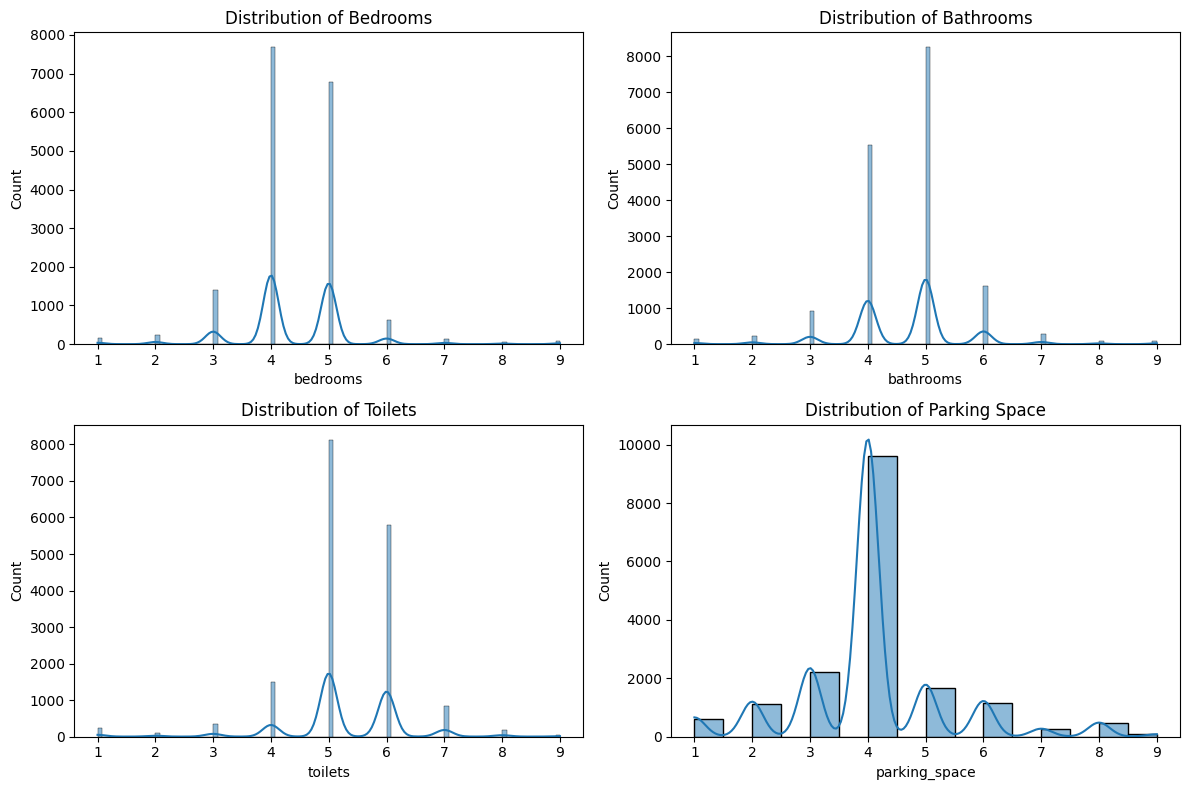

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histograms for numerical features
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(trimmed_data['bedrooms'], kde=True)
plt.title('Distribution of Bedrooms')

plt.subplot(2, 2, 2)
sns.histplot(trimmed_data['bathrooms'], kde=True)
plt.title('Distribution of Bathrooms')

plt.subplot(2, 2, 3)
sns.histplot(trimmed_data['toilets'], kde=True)
plt.title('Distribution of Toilets')

plt.subplot(2, 2, 4)
sns.histplot(trimmed_data['parking_space'], kde=True)
plt.title('Distribution of Parking Space')

plt.tight_layout()
plt.show()



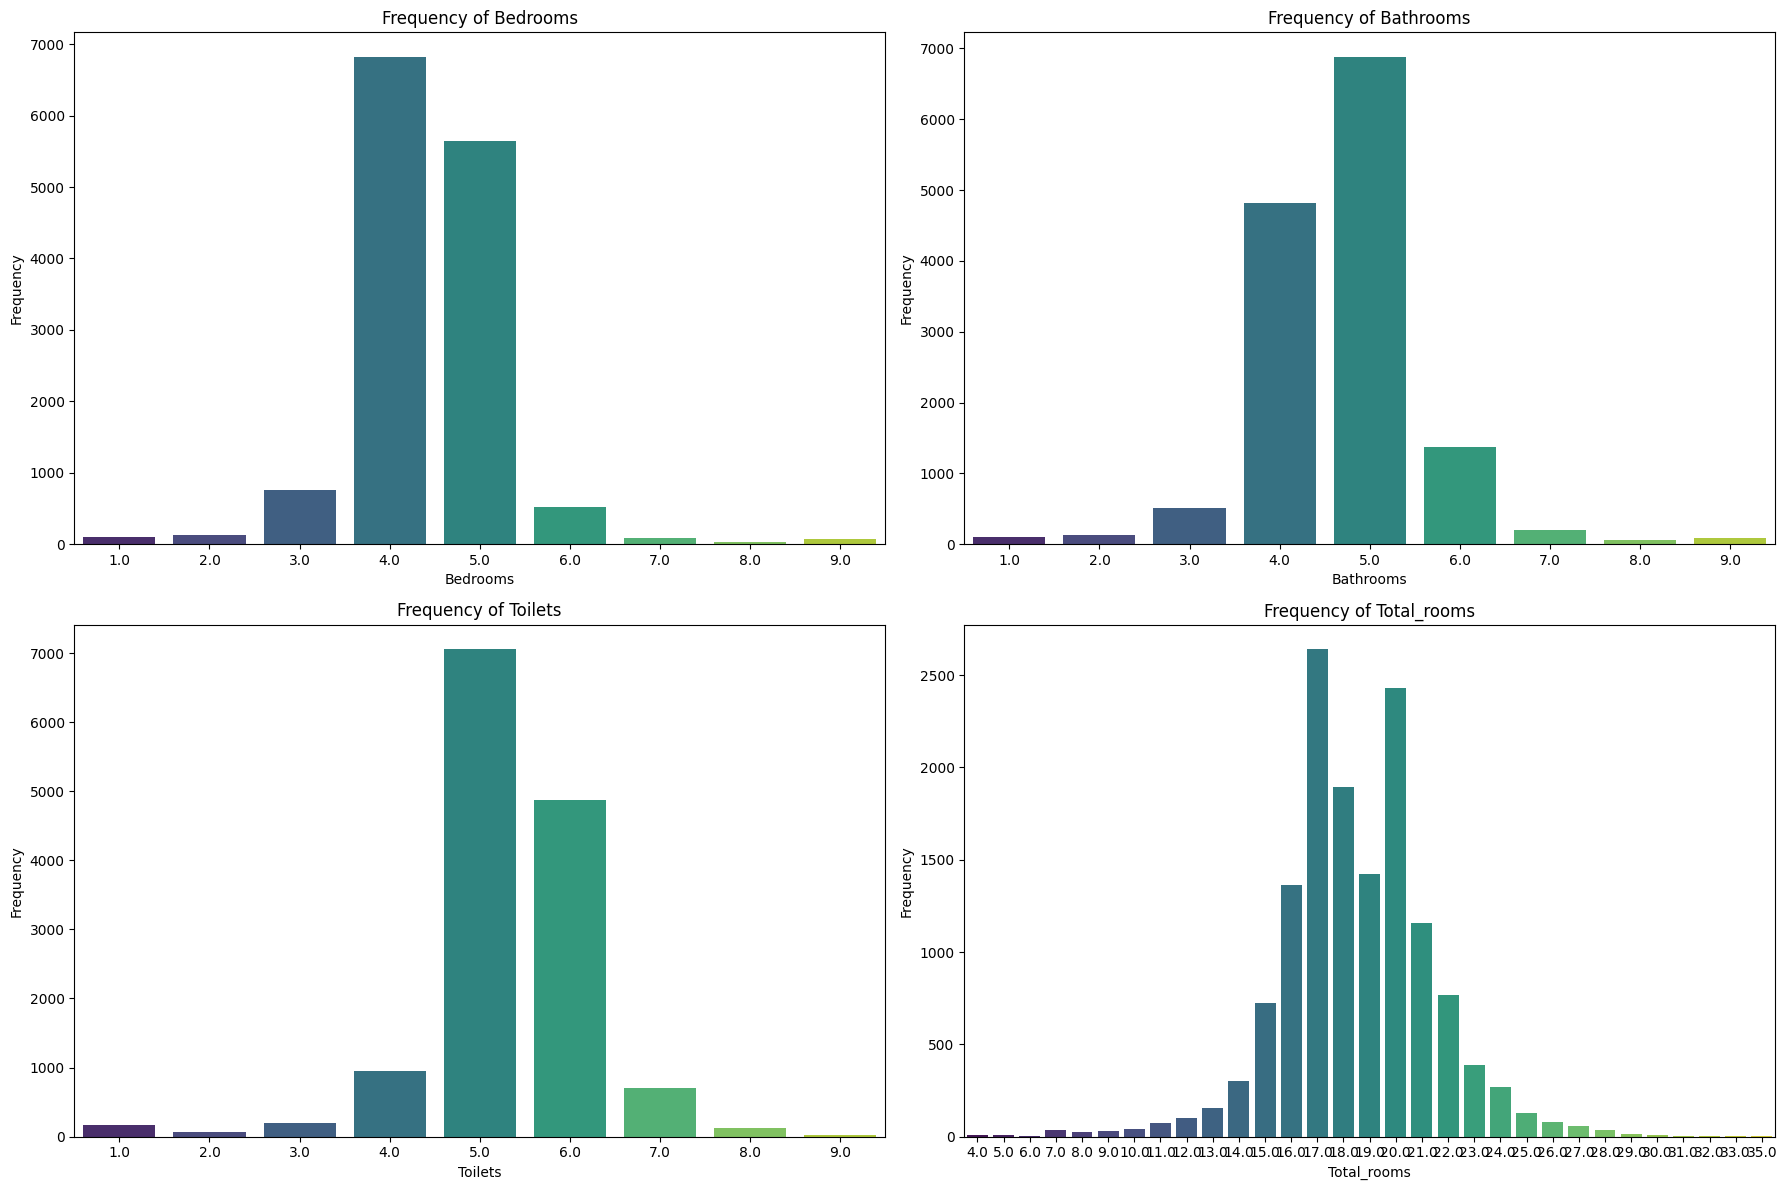

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categorical columns for which we want to plot frequencies
categorical_columns = ['bedrooms', 'bathrooms', 'toilets','total_rooms']

# Create a figure with multiple subplots
plt.figure(figsize=(18, 12))

# Loop through each categorical column and plot a bar chart
for i, column in enumerate(categorical_columns, 1):
    # Calculate frequency of each value in the column
    value_counts = trimmed_data[column].value_counts()

    # Plot bar chart
    plt.subplot(2, 2, i)
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
    plt.title(f'Frequency of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')


# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate and print frequency of 'bedrooms'
bedroom_counts = trimmed_data['bedrooms'].value_counts()
print(bedroom_counts)
# Calculate and print frequency of 'bathrooms'
bathroom_counts = trimmed_data['bathrooms'].value_counts()
print(bathroom_counts)
# Calculate and print frequency of 'toilets'
toilet_counts = trimmed_data['toilets'].value_counts()
print(toilet_counts)

# Calculate and print frequency of 'total_rooms'
total_rooms_counts = trimmed_data['total_rooms'].value_counts()
print(total_rooms_counts)

bedrooms
4.0    6825
5.0    5647
3.0     755
6.0     514
2.0     130
1.0     102
7.0      89
9.0      79
8.0      37
Name: count, dtype: int64
bathrooms
5.0    6884
4.0    4822
6.0    1378
3.0     511
7.0     202
2.0     130
1.0     101
9.0      88
8.0      62
Name: count, dtype: int64
toilets
5.0    7057
6.0    4875
4.0     951
7.0     709
3.0     193
1.0     171
8.0     126
2.0      66
9.0      30
Name: count, dtype: int64
total_rooms
17.0    2641
20.0    2430
18.0    1894
19.0    1425
16.0    1363
21.0    1156
22.0     765
15.0     725
23.0     390
14.0     299
24.0     270
13.0     156
25.0     126
12.0     102
26.0      79
11.0      76
27.0      57
10.0      42
7.0       38
28.0      36
9.0       31
8.0       23
29.0      12
4.0       11
30.0       9
5.0        9
6.0        5
31.0       4
33.0       2
32.0       1
35.0       1
Name: count, dtype: int64


**Data Preprocessing**


In [ ]:
# Check for missing values in the cleaned dataset
missing_values_cleaned = trimmed_data.isnull().sum()
print("Missing Values in Cleaned Dataset:")
print(missing_values_cleaned)

Missing Values in Cleaned Dataset:
bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
total_rooms      0
dtype: int64


In [ ]:
trimmed_data.drop(columns=['parking_space', 'title', 'town', 'state'], inplace = True)

<Axes: >

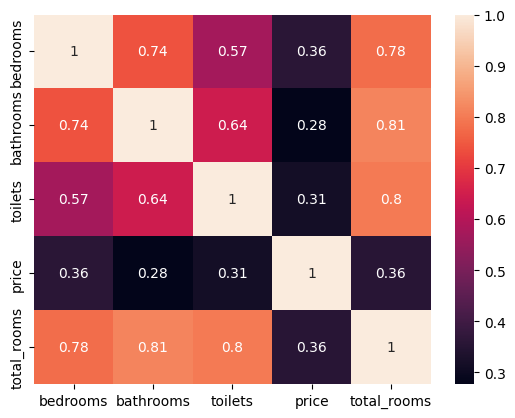

In [ ]:
corr = trimmed_data.corr()
sns.heatmap(corr, annot=True)

In [ ]:
print(corr)

             bedrooms  bathrooms   toilets     price  total_rooms
bedrooms     1.000000   0.739923  0.571015  0.356347     0.779405
bathrooms    0.739923   1.000000  0.642284  0.276956     0.813967
toilets      0.571015   0.642284  1.000000  0.313762     0.797351
price        0.356347   0.276956  0.313762  1.000000     0.355218
total_rooms  0.779405   0.813967  0.797351  0.355218     1.000000


In [ ]:
# removing outliers
trim = q1, q9 = trimmed_data["price"].quantile([0.1, 0.9])
mask = trimmed_data["price"].between(q1,q9)
trimmed_data = trimmed_data[mask]

In [ ]:
trimmed_data

,bedrooms,bathrooms,toilets,price,total_rooms
2,4.0,5.0,5.0,120000000.0,18.0
4,4.0,4.0,5.0,75000000.0,15.0
6,4.0,5.0,5.0,65000000.0,18.0
9,4.0,4.0,5.0,60000000.0,18.0
12,4.0,5.0,6.0,65000000.0,18.0
...,...,...,...,...,...
24318,4.0,5.0,5.0,110000000.0,18.0
24320,3.0,4.0,4.0,80000000.0,16.0
24323,4.0,5.0,5.0,68000000.0,18.0
24324,3.0,4.0,4.0,78000000.0,14.0


In [ ]:
trimmed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14178 entries, 2 to 24325
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     14178 non-null  float64
 1   bathrooms    14178 non-null  float64
 2   toilets      14178 non-null  float64
 3   price        14178 non-null  float64
 4   total_rooms  14178 non-null  float64
dtypes: float64(5)
memory usage: 664.6 KB


In [ ]:
import statsmodels.api as sm

# Define the independent variables (features) and the dependent variable (target)
X = trimmed_data[['bedrooms', 'bathrooms', 'toilets', 'total_rooms']]
y = trimmed_data['price']

# Add a constant term to the independent variables matrix (X) for the intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     557.6
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:12:18   Log-Likelihood:            -2.6604e+05
No. Observations:               14178   AIC:                         5.321e+05
Df Residuals:                   14173   BIC:                         5.321e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.096e+07   1.87e+06      5.854      

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'trimmed_data' is your preprocessed DataFrame
X = trimmed_data.drop('price', axis=1)  # Features
y = trimmed_data['price']  # Target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Define hyperparameters for grid search
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Perform GridSearchCV with cross-validation (CV=5)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Calculate RMSE and R^2
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r_squared = r2_score(y_test, y_pred)

# Display results
print("Best Parameters:", best_params)
print("RMSE on Test Set:", rmse)
print("R^2 on Test Set:", r_squared)


Best Parameters: {'copy_X': True, 'fit_intercept': True}
RMSE on Test Set: 34269008.67874157
R^2 on Test Set: 0.14152077075731895


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'trimmed_data' is your preprocessed DataFrame
X = trimmed_data.drop('price', axis=1)  # Features
y = trimmed_data['price']  # Target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree regressor model
model = DecisionTreeRegressor()

# Define hyperparameters for grid search
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV with cross-validation (CV=5)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Calculate RMSE and R^2
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r_squared = r2_score(y_test, y_pred)

# Display results
print("Best Parameters:", best_params)
print("RMSE on Test Set:", rmse)
print("R^2 on Test Set:", r_squared)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
RMSE on Test Set: 32995978.932856183
R^2 on Test Set: 0.20411788710316348


In [ ]:
# Get feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(importance_df)


Feature Importances:
       Feature  Importance
0     bedrooms    0.871787
3  total_rooms    0.064843
2      toilets    0.036034
1    bathrooms    0.027336


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'trimmed_data' is your preprocessed DataFrame
X = trimmed_data.drop('price', axis=1)  # Features
y = trimmed_data['price']  # Target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor model
model = RandomForestRegressor()

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV with cross-validation (CV=5)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Calculate RMSE and R^2
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r_squared = r2_score(y_test, y_pred)

# Display results
print("Best Parameters:", best_params)
print("RMSE on Test Set:", rmse)
print("R^2 on Test Set:", r_squared)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
RMSE on Test Set: 32806705.955290373
R^2 on Test Set: 0.21322244658053613


In [ ]:
# Get feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(importance_df)

Feature Importances:
       Feature  Importance
0     bedrooms    0.871787
3  total_rooms    0.064843
2      toilets    0.036034
1    bathrooms    0.027336


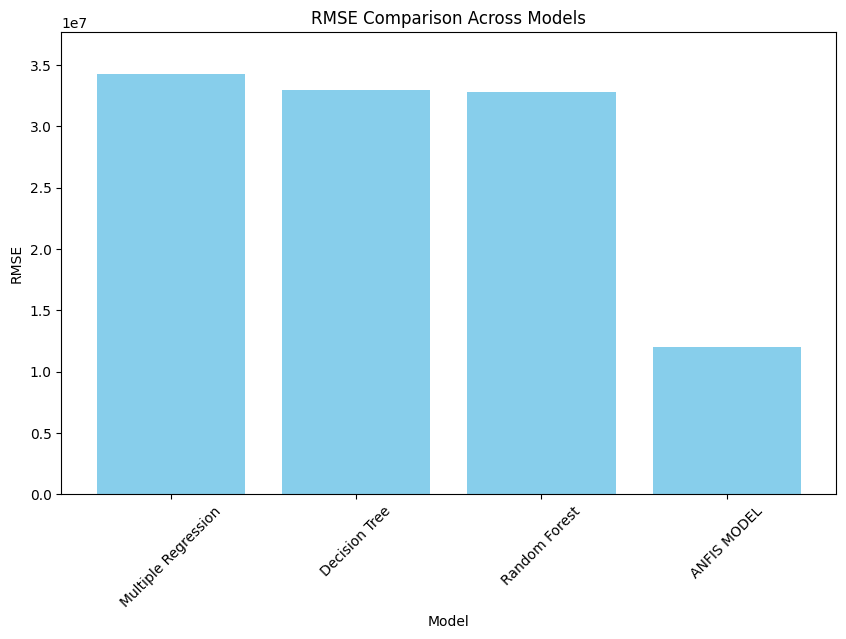

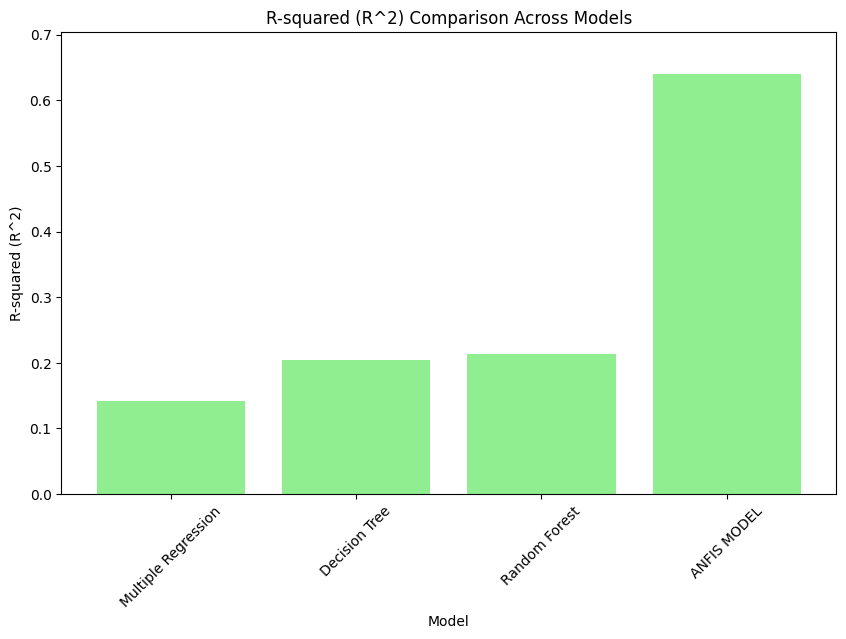

In [2]:
import matplotlib.pyplot as plt

# Data for bar charts
metrics = ['RMSE', 'R^2']
model_names = ['Multiple Regression', 'Decision Tree', 'Random Forest','ANFIS MODEL']
rmse_values = [34269008.67874157, 32995978.932856183, 32806705.955290373,12041594.57879]
r2_values = [0.14152077075731895, 0.20411788710316348, 0.21322244658053613, 0.64]

# Create bar chart for RMSE
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color='skyblue')
plt.title('RMSE Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_values) * 1.1)  # Adjust y-axis limit for better visualization
plt.xticks(rotation=45)
plt.show()

# Create bar chart for R-squared (R^2)
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values, color='lightgreen')
plt.title('R-squared (R^2) Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('R-squared (R^2)')
plt.ylim(0, max(r2_values) * 1.1)  # Adjust y-axis limit for better visualization
plt.xticks(rotation=45)
plt.show()
